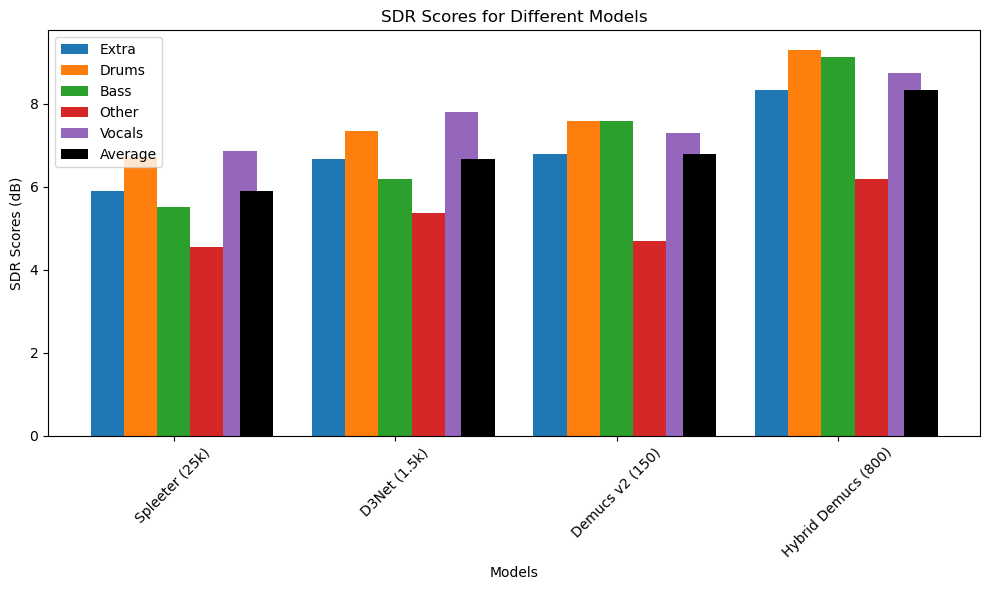

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data
models = ['Spleeter (25k)', 'D3Net (1.5k)', 'Demucs v2 (150)', 'Hybrid Demucs (800)']
extra = [5.91, 6.68, 6.79, 8.34]
drums = [6.71, 7.36, 7.58, 9.31]
bass = [5.51, 6.20, 7.60, 9.13]
other = [4.55, 5.37, 4.69, 6.18]
vocals = [6.86, 7.80, 7.29, 8.75]
average = [5.91, 6.68, 6.79, 8.34]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': models,
    'Extra': extra,
    'Drums': drums,
    'Bass': bass,
    'Other': other,
    'Vocals': vocals,
    'Average': average
})

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))

# Set positions for the bars
bar_width = 0.15
index = np.arange(len(models))

# Plotting the bars for each category
ax.bar(index - 2*bar_width, df['Extra'], bar_width, label='Extra')
ax.bar(index - bar_width, df['Drums'], bar_width, label='Drums')
ax.bar(index, df['Bass'], bar_width, label='Bass')
ax.bar(index + bar_width, df['Other'], bar_width, label='Other')
ax.bar(index + 2*bar_width, df['Vocals'], bar_width, label='Vocals')

# Plotting average bars with a separate color
ax.bar(index + 2.5*bar_width, df['Average'], bar_width, label='Average', color='black')

# Labeling the plot
ax.set_xlabel('Models')
ax.set_ylabel('SDR Scores (dB)')
ax.set_title('SDR Scores for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(df['Model'], rotation=45)
ax.legend()

plt.tight_layout()
plt.savefig('sdr_scores_comparison.png')  # Change filename and format if needed
plt.show()


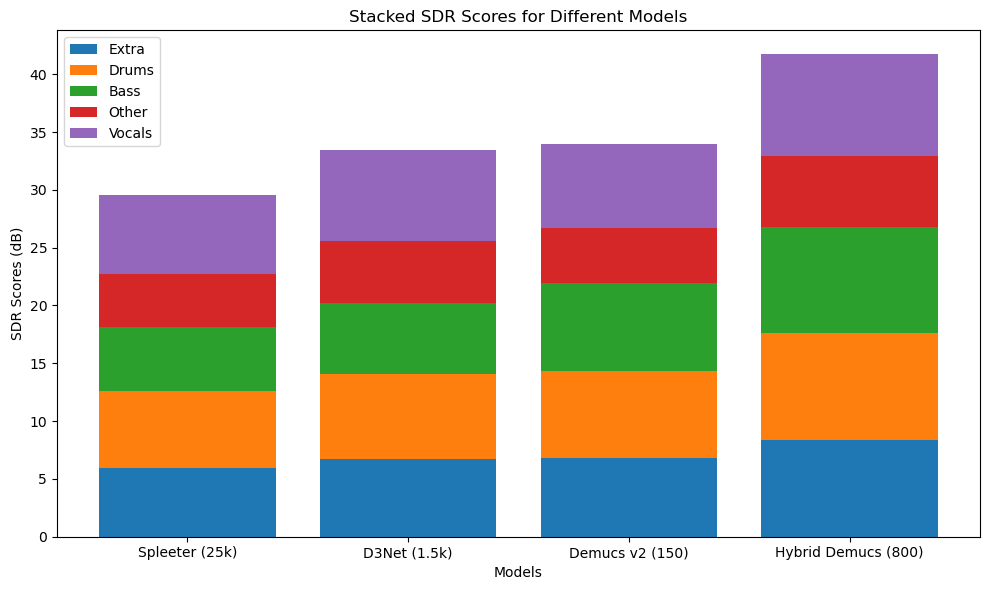

In [19]:
# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Stacking the bars for each category
ax.bar(df['Model'], df['Extra'], label='Extra')
ax.bar(df['Model'], df['Drums'], bottom=df['Extra'], label='Drums')
ax.bar(df['Model'], df['Bass'], bottom=df['Extra'] + df['Drums'], label='Bass')
ax.bar(df['Model'], df['Other'], bottom=df['Extra'] + df['Drums'] + df['Bass'], label='Other')
ax.bar(df['Model'], df['Vocals'], bottom=df['Extra'] + df['Drums'] + df['Bass'] + df['Other'], label='Vocals')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('SDR Scores (dB)')
ax.set_title('Stacked SDR Scores for Different Models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('image1.png')  # Change filename and format if needed
plt.show()


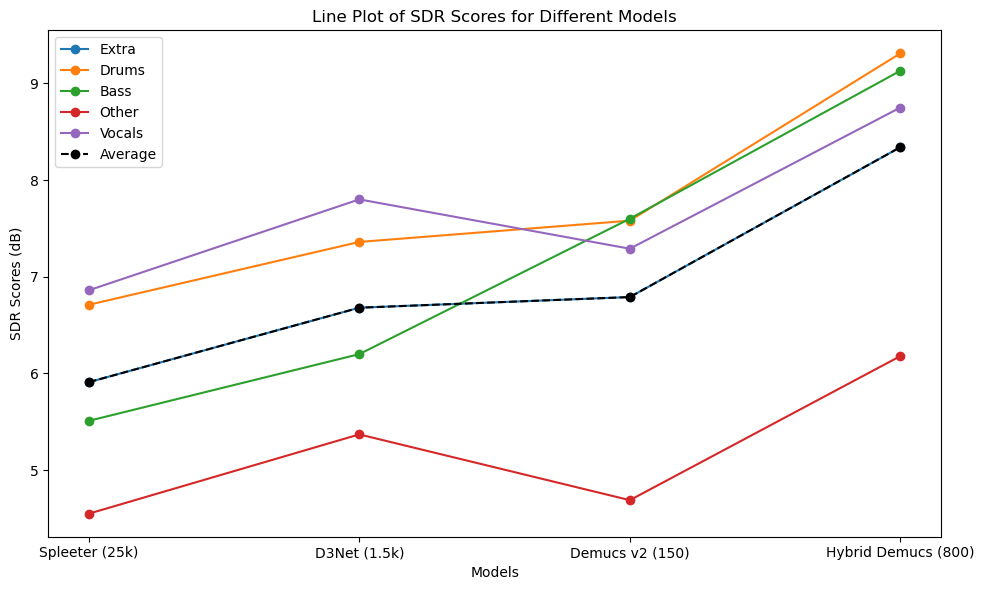

In [21]:
# Line Chart (Average vs Categories)
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each category and average
ax.plot(df['Model'], df['Extra'], label='Extra', marker='o')
ax.plot(df['Model'], df['Drums'], label='Drums', marker='o')
ax.plot(df['Model'], df['Bass'], label='Bass', marker='o')
ax.plot(df['Model'], df['Other'], label='Other', marker='o')
ax.plot(df['Model'], df['Vocals'], label='Vocals', marker='o')
ax.plot(df['Model'], df['Average'], label='Average', marker='o', linestyle='--', color='black')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('SDR Scores (dB)')
ax.set_title('Line Plot of SDR Scores for Different Models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('image2.png')
plt.show()


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
models = ['Spleeter (25k)', 'D3Net (1.5k)', 'Demucs v2 (150)', 'Hybrid Demucs (800)']
extra = [5.91, 6.68, 6.79, 8.34]
drums = [6.71, 7.36, 7.58, 9.31]
bass = [5.51, 6.20, 7.60, 9.13]
other = [4.55, 5.37, 4.69, 6.18]
vocals = [6.86, 7.80, 7.29, 8.75]
average = [5.91, 6.68, 6.79, 8.34]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': models,
    'Extra': extra,
    'Drums': drums,
    'Bass': bass,
    'Other': other,
    'Vocals': vocals,
    'Average': average
})

# Function to create and save a radar chart
def plot_radar_chart(data, categories, model_name):
    # Number of variables (categories)
    num_vars = len(categories)
    
    # Angles for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Complete the loop
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='blue', alpha=0.25)
    ax.plot(angles, data, color='blue', linewidth=2, label=model_name)
    
    # Set labels for categories
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Add title
    ax.set_title(f'Radar Chart for {model_name}', size=15, color='blue', y=1.1)

    # Save the plot to a file
    filename = f"radar_chart_{model_name.replace(' ', '_')}.png"  # Save with model name in the filename
    plt.tight_layout()
    plt.savefig(filename)  # Save the chart as a PNG file
    plt.close()  # Close the figure to avoid overlap between plots

# Categories (Extra, Drums, Bass, Other, Vocals)
categories = ['Extra', 'Drums', 'Bass', 'Other', 'Vocals']

# Plot and save each model's radar chart
for model in df['Model']:
    data = df[df['Model'] == model][categories].values.flatten()
    plot_radar_chart(data, categories, model)

print("Radar charts saved successfully!")


Radar charts saved successfully!


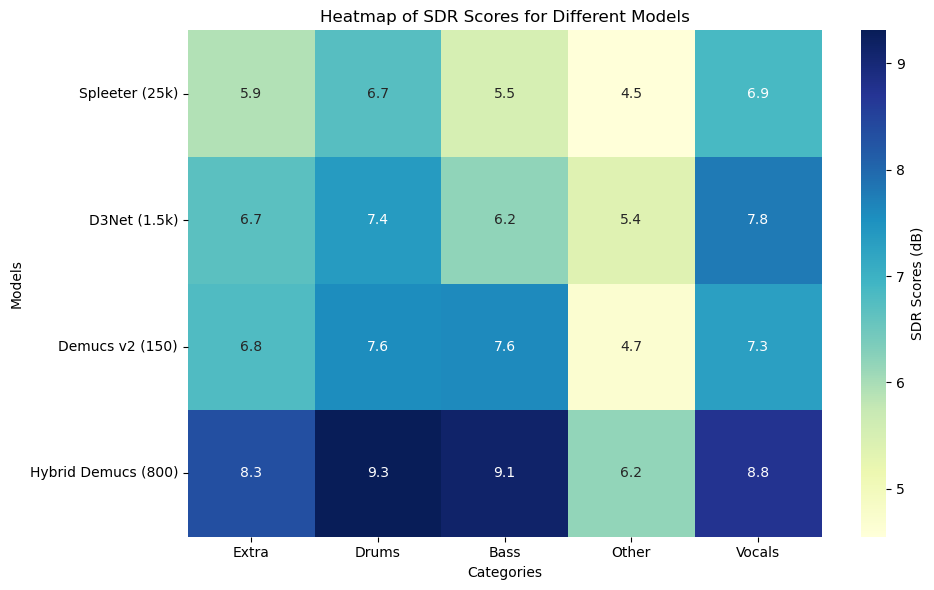

In [25]:
import seaborn as sns

# Create a DataFrame for heatmap
heatmap_data = df.set_index('Model')[categories]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'SDR Scores (dB)'})

# Adding title and labels
plt.title('Heatmap of SDR Scores for Different Models')
plt.ylabel('Models')
plt.xlabel('Categories')

# Show the plot
plt.tight_layout()
plt.savefig('image4.png')
plt.show()


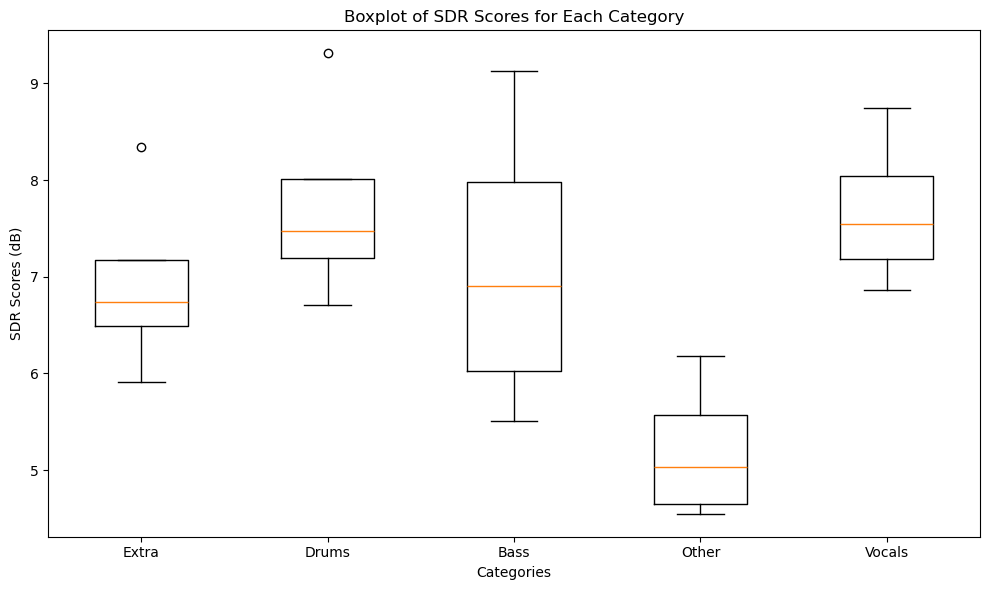

In [27]:
# Boxplot for each category
fig, ax = plt.subplots(figsize=(10, 6))

# Data for boxplot
box_data = [df[category] for category in categories]

# Plot the boxplot
ax.boxplot(box_data, labels=categories)

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('SDR Scores (dB)')
ax.set_title('Boxplot of SDR Scores for Each Category')

# Show the plot
plt.tight_layout()
plt.savefig('image5.png')
plt.show()


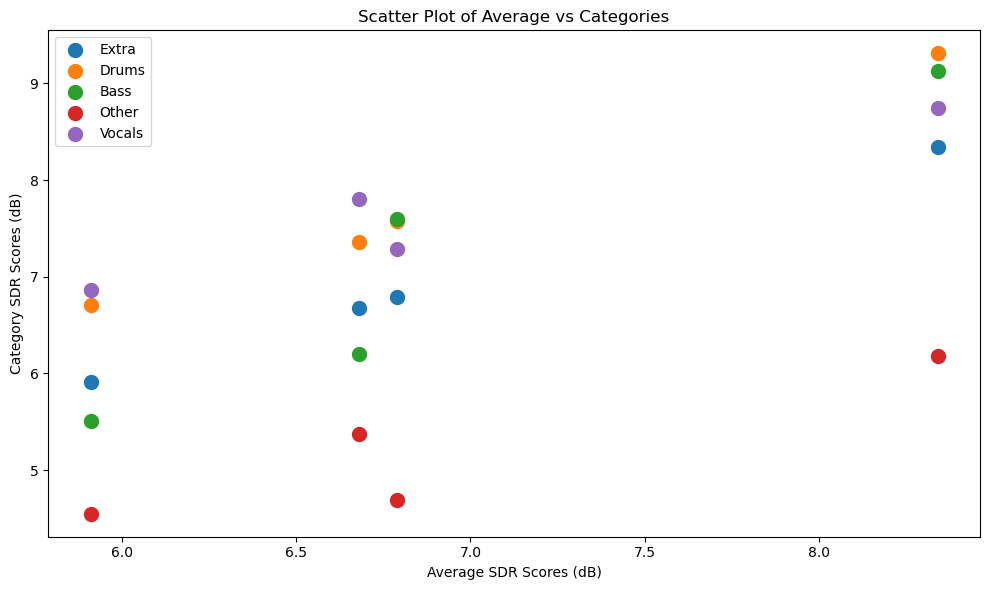

In [29]:
# Scatter plot for average vs individual categories
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting scatter for each category vs Average
for category in categories:
    ax.scatter(df['Average'], df[category], label=category, s=100)

# Adding labels and title
ax.set_xlabel('Average SDR Scores (dB)')
ax.set_ylabel('Category SDR Scores (dB)')
ax.set_title('Scatter Plot of Average vs Categories')

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('image6.png')
plt.show()


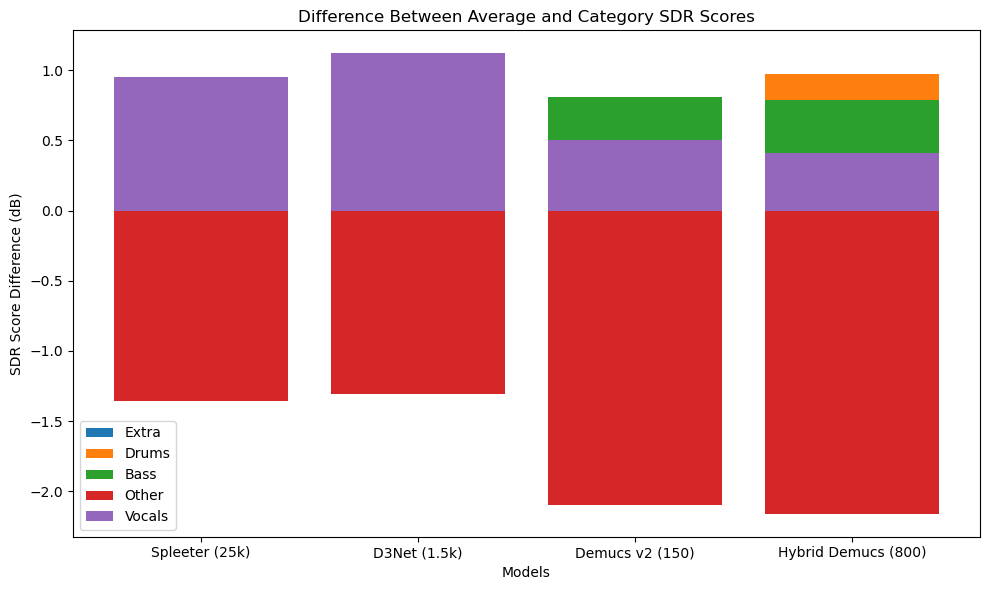

In [31]:
# Difference between Average and Category SDR Scores
diff_data = df[categories].sub(df['Average'], axis=0)

# Bar chart of differences
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the difference for each category
for idx, category in enumerate(categories):
    ax.bar(df['Model'], diff_data[category], label=category)

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('SDR Score Difference (dB)')
ax.set_title('Difference Between Average and Category SDR Scores')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('image7.png')
plt.show()


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
models = ['Spleeter (25k)', 'D3Net (1.5k)', 'Demucs v2 (150)', 'Hybrid Demucs (800)']
extra = [5.91, 6.68, 6.79, 8.34]
drums = [6.71, 7.36, 7.58, 9.31]
bass = [5.51, 6.20, 7.60, 9.13]
other = [4.55, 5.37, 4.69, 6.18]
vocals = [6.86, 7.80, 7.29, 8.75]
average = [5.91, 6.68, 6.79, 8.34]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': models,
    'Extra': extra,
    'Drums': drums,
    'Bass': bass,
    'Other': other,
    'Vocals': vocals,
    'Average': average
})

# Function to create and save a line chart
def plot_line_chart(data, categories, model_name):
    # Create the line chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each category as a line
    ax.plot(categories, data, marker='o', label=model_name, linewidth=2)
    
    # Adding title and labels
    ax.set_title(f'Line Chart for {model_name}', size=15)
    ax.set_xlabel('Categories')
    ax.set_ylabel('SDR Scores (dB)')
    
    # Adding a grid and legend
    ax.grid(True)
    ax.legend()

    # Save the plot to a file
    filename = f"line_chart_{model_name.replace(' ', '_')}.png"  # Save with model name in the filename
    plt.tight_layout()
    plt.savefig(filename)  # Save the chart as a PNG file
    plt.close()  # Close the figure to avoid overlap between plots

# Categories (Extra, Drums, Bass, Other, Vocals)
categories = ['Extra', 'Drums', 'Bass', 'Other', 'Vocals']

# Plot and save each model's line chart
for model in df['Model']:
    data = df[df['Model'] == model][categories].values.flatten()
    plot_line_chart(data, categories, model)

print("Line charts saved successfully!")


Line charts saved successfully!


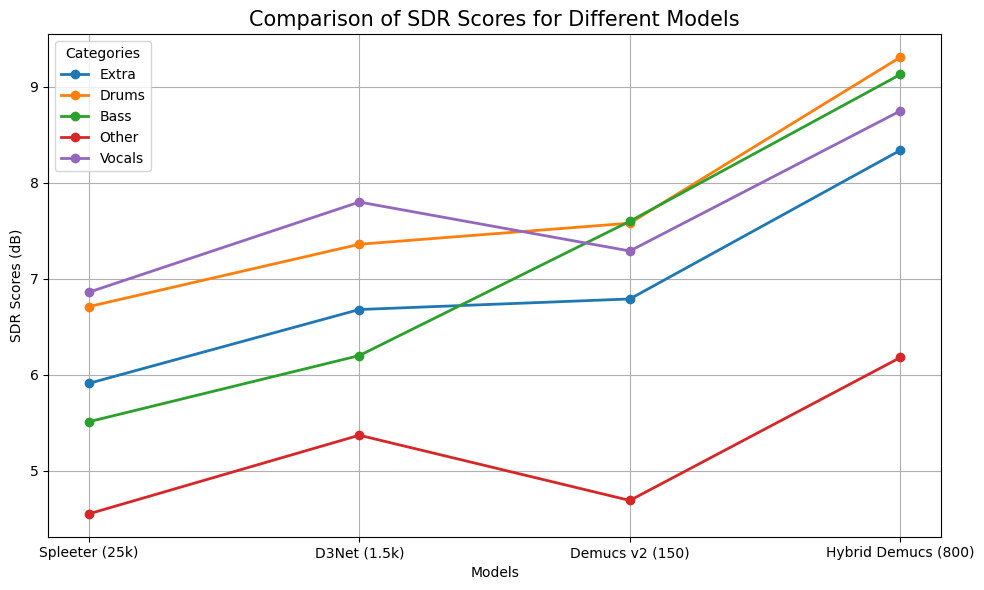

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
models = ['Spleeter (25k)', 'D3Net (1.5k)', 'Demucs v2 (150)', 'Hybrid Demucs (800)']
extra = [5.91, 6.68, 6.79, 8.34]
drums = [6.71, 7.36, 7.58, 9.31]
bass = [5.51, 6.20, 7.60, 9.13]
other = [4.55, 5.37, 4.69, 6.18]
vocals = [6.86, 7.80, 7.29, 8.75]
average = [5.91, 6.68, 6.79, 8.34]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': models,
    'Extra': extra,
    'Drums': drums,
    'Bass': bass,
    'Other': other,
    'Vocals': vocals,
    'Average': average
})

# Categories (Extra, Drums, Bass, Other, Vocals)
categories = ['Extra', 'Drums', 'Bass', 'Other', 'Vocals']

# Plotting the single line chart for all models
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each category for each model as a separate line
for category in categories:
    ax.plot(df['Model'], df[category], marker='o', label=category, linewidth=2)

# Adding title and labels
ax.set_title('Comparison of SDR Scores for Different Models', size=15)
ax.set_xlabel('Models')
ax.set_ylabel('SDR Scores (dB)')

# Adding a grid and legend
ax.grid(True)
ax.legend(title='Categories')

# Save the plot to a file
plt.tight_layout()
plt.savefig('single_line_chart_comparison.png')  # Save the chart as a PNG file

# Show the plot
plt.show()
